In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [95]:
from sklearn.cluster import (
    KMeans,
    AffinityPropagation,
    MeanShift,
    AgglomerativeClustering,
    DBSCAN
)
from sklearn.preprocessing import StandardScaler

In [89]:
file = pd.read_csv("s1.txt", delimiter="    ")

C:\Users\nikit\AppData\Local\Temp\ipykernel_38248\3764212423.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  file = pd.read_csv("s1.txt", delimiter="    ")


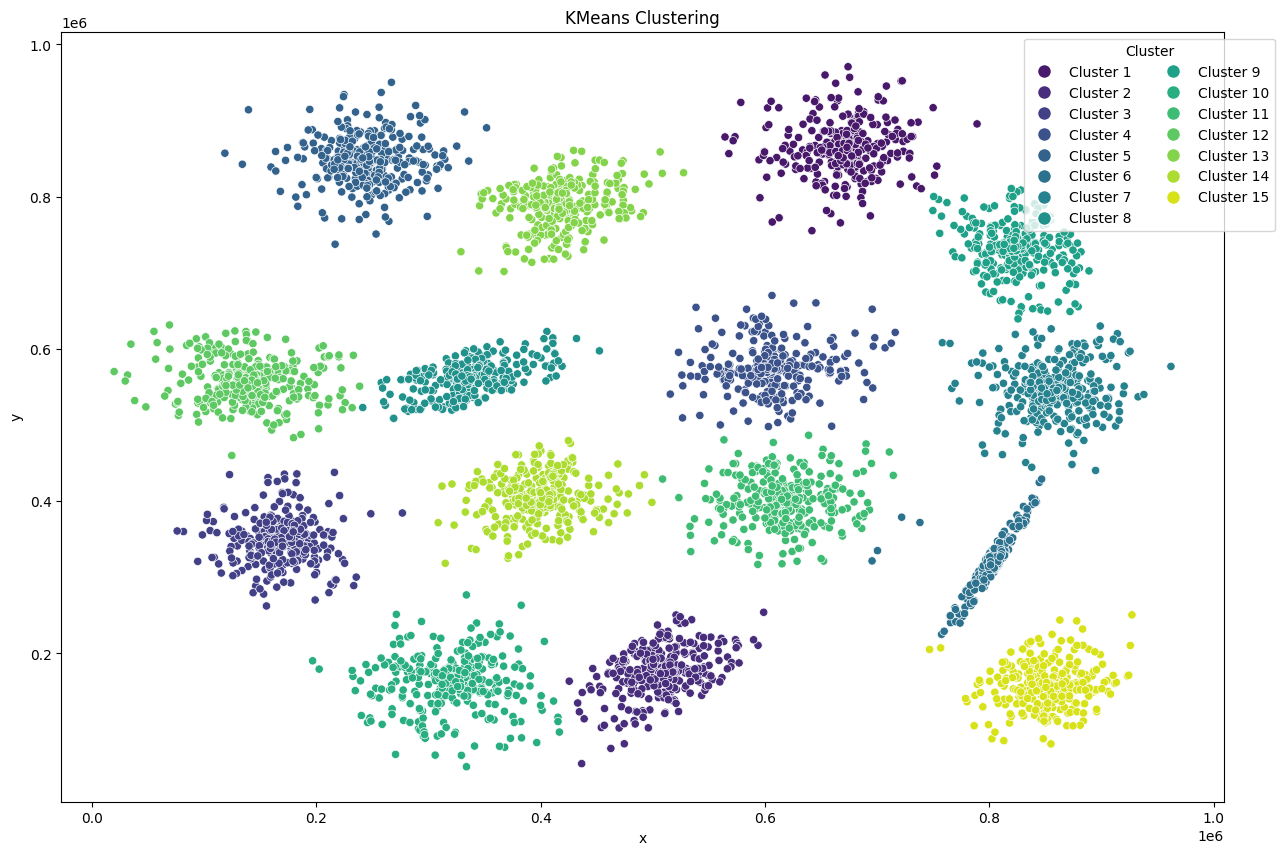

In [91]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(file)
labels = kmeans.labels_

plt.figure(figsize=(15, 10))
plt.title("KMeans Clustering")
plt.xlabel("x")
plt.ylabel("y")

palette = sns.color_palette("viridis", 15)
sns.scatterplot(x=file.iloc[:, 0], y=file.iloc[:, 1], hue=labels, palette=palette)

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f"Cluster {i+1}", markerfacecolor=palette[i], markersize=10) for i in range(15)]
plt.legend(handles=legend_handles, title="Cluster", loc="upper right", bbox_to_anchor=(1.05, 1), ncol=2, prop={"size": 10})

plt.show()

c:\Users\nikit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


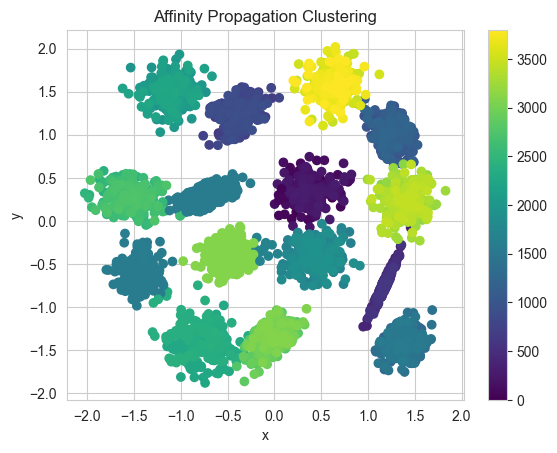

In [102]:
scaler = StandardScaler()
X_std = scaler.fit_transform(file)

# Apply Affinity Propagation clustering with 15 clusters
ap = AffinityPropagation(preference=-50, max_iter=50, damping=0.7, random_state=42, convergence_iter=20).fit(X_std)
cluster_labels = ap.labels_

# Get the number of clusters
n_clusters = len(set(cluster_labels))

# Create a seaborn scatterplot
sns.set_style("whitegrid")
plt.scatter(X_std[:, 0], X_std[:, 1], c=cluster_labels, cmap="viridis")
plt.title("Affinity Propagation Clustering")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()